In [1]:
import numpy as np
from matplotlib import rcParams
from matplotlib import pyplot as plt
import xarray as xr
rcParams["font.size"] = 15

In [2]:
directory = r'C:\Users\salla\Onedrive(uoft acc)\OneDrive - University of Toronto\Desktop\School Information\NSERC\OSIRIS'

path = directory + r'\*.nc'

f = xr.open_mfdataset(
    path,
    combine="nested",
    concat_dim="profile_id",
    parallel=True,
    decode_cf=True
)

In [3]:
#Promote `time` from a 1D coordinate to a real dimension
f = f.swap_dims({"profile_id": "time"})

# Sort dataset by time to enable fast slicing
f = f.sortby("time")

In [4]:
# check the .where stuff
O3_density = f["ozone_concentration"].T
# vmr = num gas/num air or vol gas/vol air or mol gas/mol air
# num density = num gas/vol air
# n/V = P/RT => V/n = RT/P (since units are given in mols)
# vmr = num density * (vol air) / (num air) = num density * RT/P
O3 = O3_density * 8.3145 * f["temperature"].T / (f["pressure"].T * 100)

In [5]:
np.nanmean(O3.values)
np.float32(2.2703205e-06)

np.float32(2.2703205e-06)

In [6]:
O3_times = O3.sel(time=slice("2006-01-01", "2020-12-31"))

C:\Users\salla\AppData\Local\Temp\ipykernel_7140\3262513258.py:16: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  pcm_seasonal.axes.flat[0].set(ylabel = "Altitude (km)")
C:\Users\salla\AppData\Local\Temp\ipykernel_7140\3262513258.py:17: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  pcm_seasonal.axes.flat[2].set(ylabel = "Altitude (km)")
C:\Users\salla\AppData\Local\Temp\ipykernel_7140\3262513258.py:18: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  pcm_seasonal.axes.flat[3].set(xlabel = "Latitude (N)")
C:\Users\salla\AppData\Local\Temp\ipykernel_7140\3262513258.py:19: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  pcm_seasonal.axes.flat[2].set(xlabel = "L

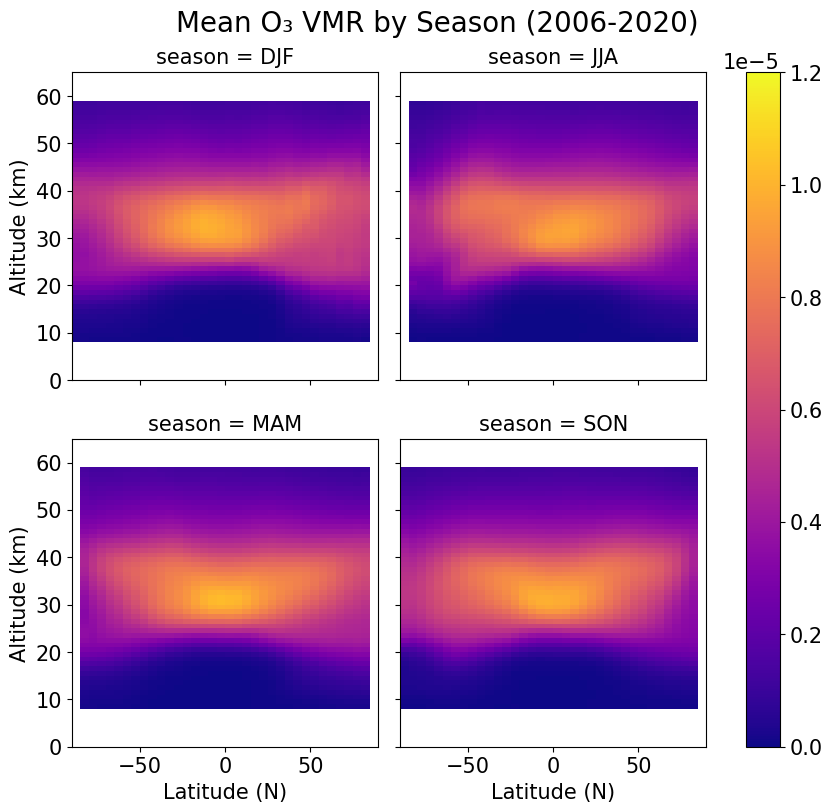

In [7]:
lat_bins = np.arange(-90,91,5)
lat_labels = (lat_bins[1:] + lat_bins[:-1]) / 2

def plotter(season):
    return season.groupby_bins("latitude", lat_bins).mean(dim = "time")
O3_binned = O3_times.groupby("time.season").map(plotter)

pcm_seasonal = O3_binned.plot(col = "season", col_wrap = 2, cmap = "plasma", size = 4, vmin = 0, vmax = 1.2 * (10 ** -5))

plt.suptitle(
    "Mean O₃ VMR by Season (2006-2020)", 
    fontsize=20,
    y=1.02
)

pcm_seasonal.axes.flat[0].set(ylabel = "Altitude (km)")
pcm_seasonal.axes.flat[2].set(ylabel = "Altitude (km)")
pcm_seasonal.axes.flat[3].set(xlabel = "Latitude (N)")
pcm_seasonal.axes.flat[2].set(xlabel = "Latitude (N)")

fig = pcm_seasonal.fig
title = fig._suptitle.get_text()
fig.savefig(title, bbox_inches="tight")

C:\Users\salla\AppData\Local\Temp\ipykernel_7140\2595977071.py:13: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(pcm_monthly.axes.flat):
C:\Users\salla\AppData\Local\Temp\ipykernel_7140\2595977071.py:22: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  pcm_monthly.axes.flat[0].set(ylabel = "Altitude (km)")
C:\Users\salla\AppData\Local\Temp\ipykernel_7140\2595977071.py:23: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  pcm_monthly.axes.flat[9].set(ylabel = "Altitude (km)")
C:\Users\salla\AppData\Local\Temp\ipykernel_7140\2595977071.py:24: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  pcm_monthly.axes.flat[6].set(ylabel = "Altitude (km

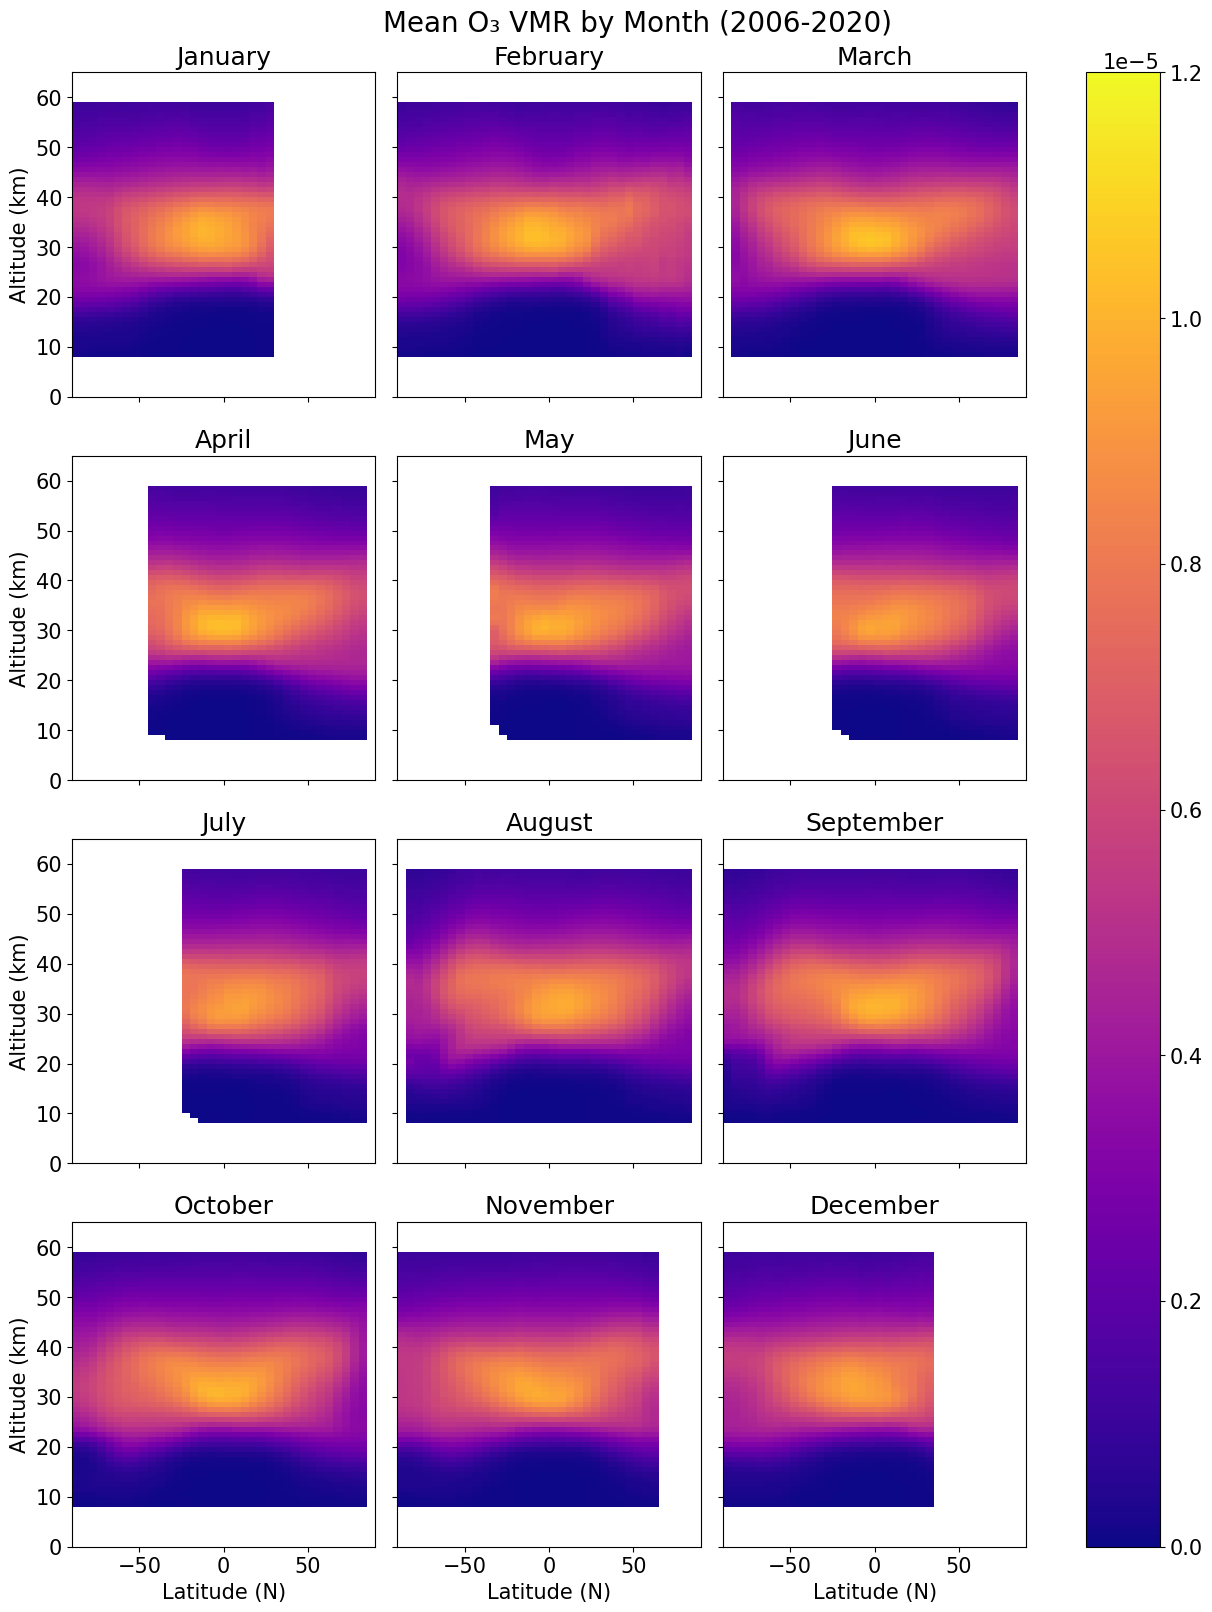

In [8]:
lat_bins = np.arange(-90,91,5)
lat_labels = (lat_bins[1:] + lat_bins[:-1]) / 2

def plotter(monthly):
    return monthly.groupby_bins("latitude", lat_bins).mean(dim = "time")

O3_binned = O3_times.groupby("time.month").map(plotter)

pcm_monthly = O3_binned.plot(col = "month", col_wrap = 3, cmap = "plasma", vmin = 0, vmax = 1.2 * (10 ** -5), size = 4)

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, ax in enumerate(pcm_monthly.axes.flat):
    ax.set_title(month_names[i])

plt.suptitle(
    "Mean O₃ VMR by Month (2006-2020)", 
    fontsize=20,
    y=1.01
)

pcm_monthly.axes.flat[0].set(ylabel = "Altitude (km)")
pcm_monthly.axes.flat[9].set(ylabel = "Altitude (km)")
pcm_monthly.axes.flat[6].set(ylabel = "Altitude (km)")
pcm_monthly.axes.flat[3].set(ylabel = "Altitude (km)")
pcm_monthly.axes.flat[9].set(xlabel = "Latitude (N)")
pcm_monthly.axes.flat[10].set(xlabel = "Latitude (N)")
pcm_monthly.axes.flat[11].set(xlabel = "Latitude (N)")

fig = pcm_monthly.fig
title = fig._suptitle.get_text()
fig.savefig(title, bbox_inches="tight")

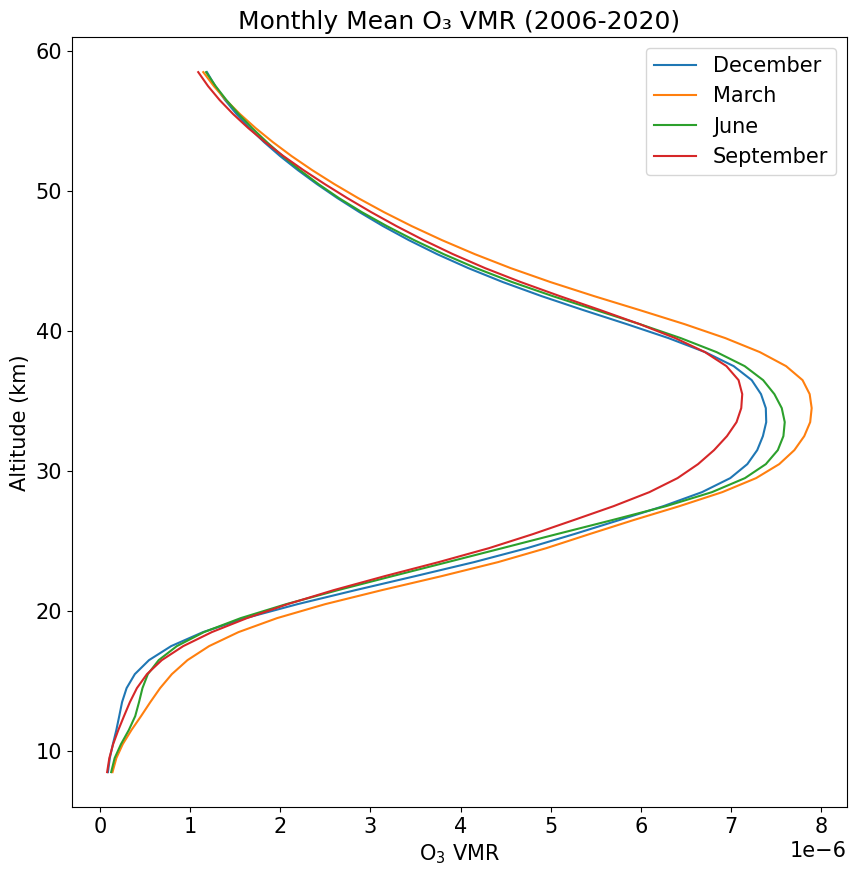

In [9]:
valid_months = [12,3,6,9]

month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(figsize = (10, 10))
for i in range(len(valid_months)):
    month_num = valid_months[i]
    O3_month = O3_times.sel(time = O3_times["time"].dt.month.isin([month_num]))
    O3_month.mean(dim = "time").plot(ax = axes, label = f"{month_name[month_num - 1]}", y = "altitude")

plt.legend()

plt.title("Monthly Mean O₃ VMR (2006-2020)")
plt.ylabel("Altitude (km)")
plt.xlabel("O$_3$ VMR")

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

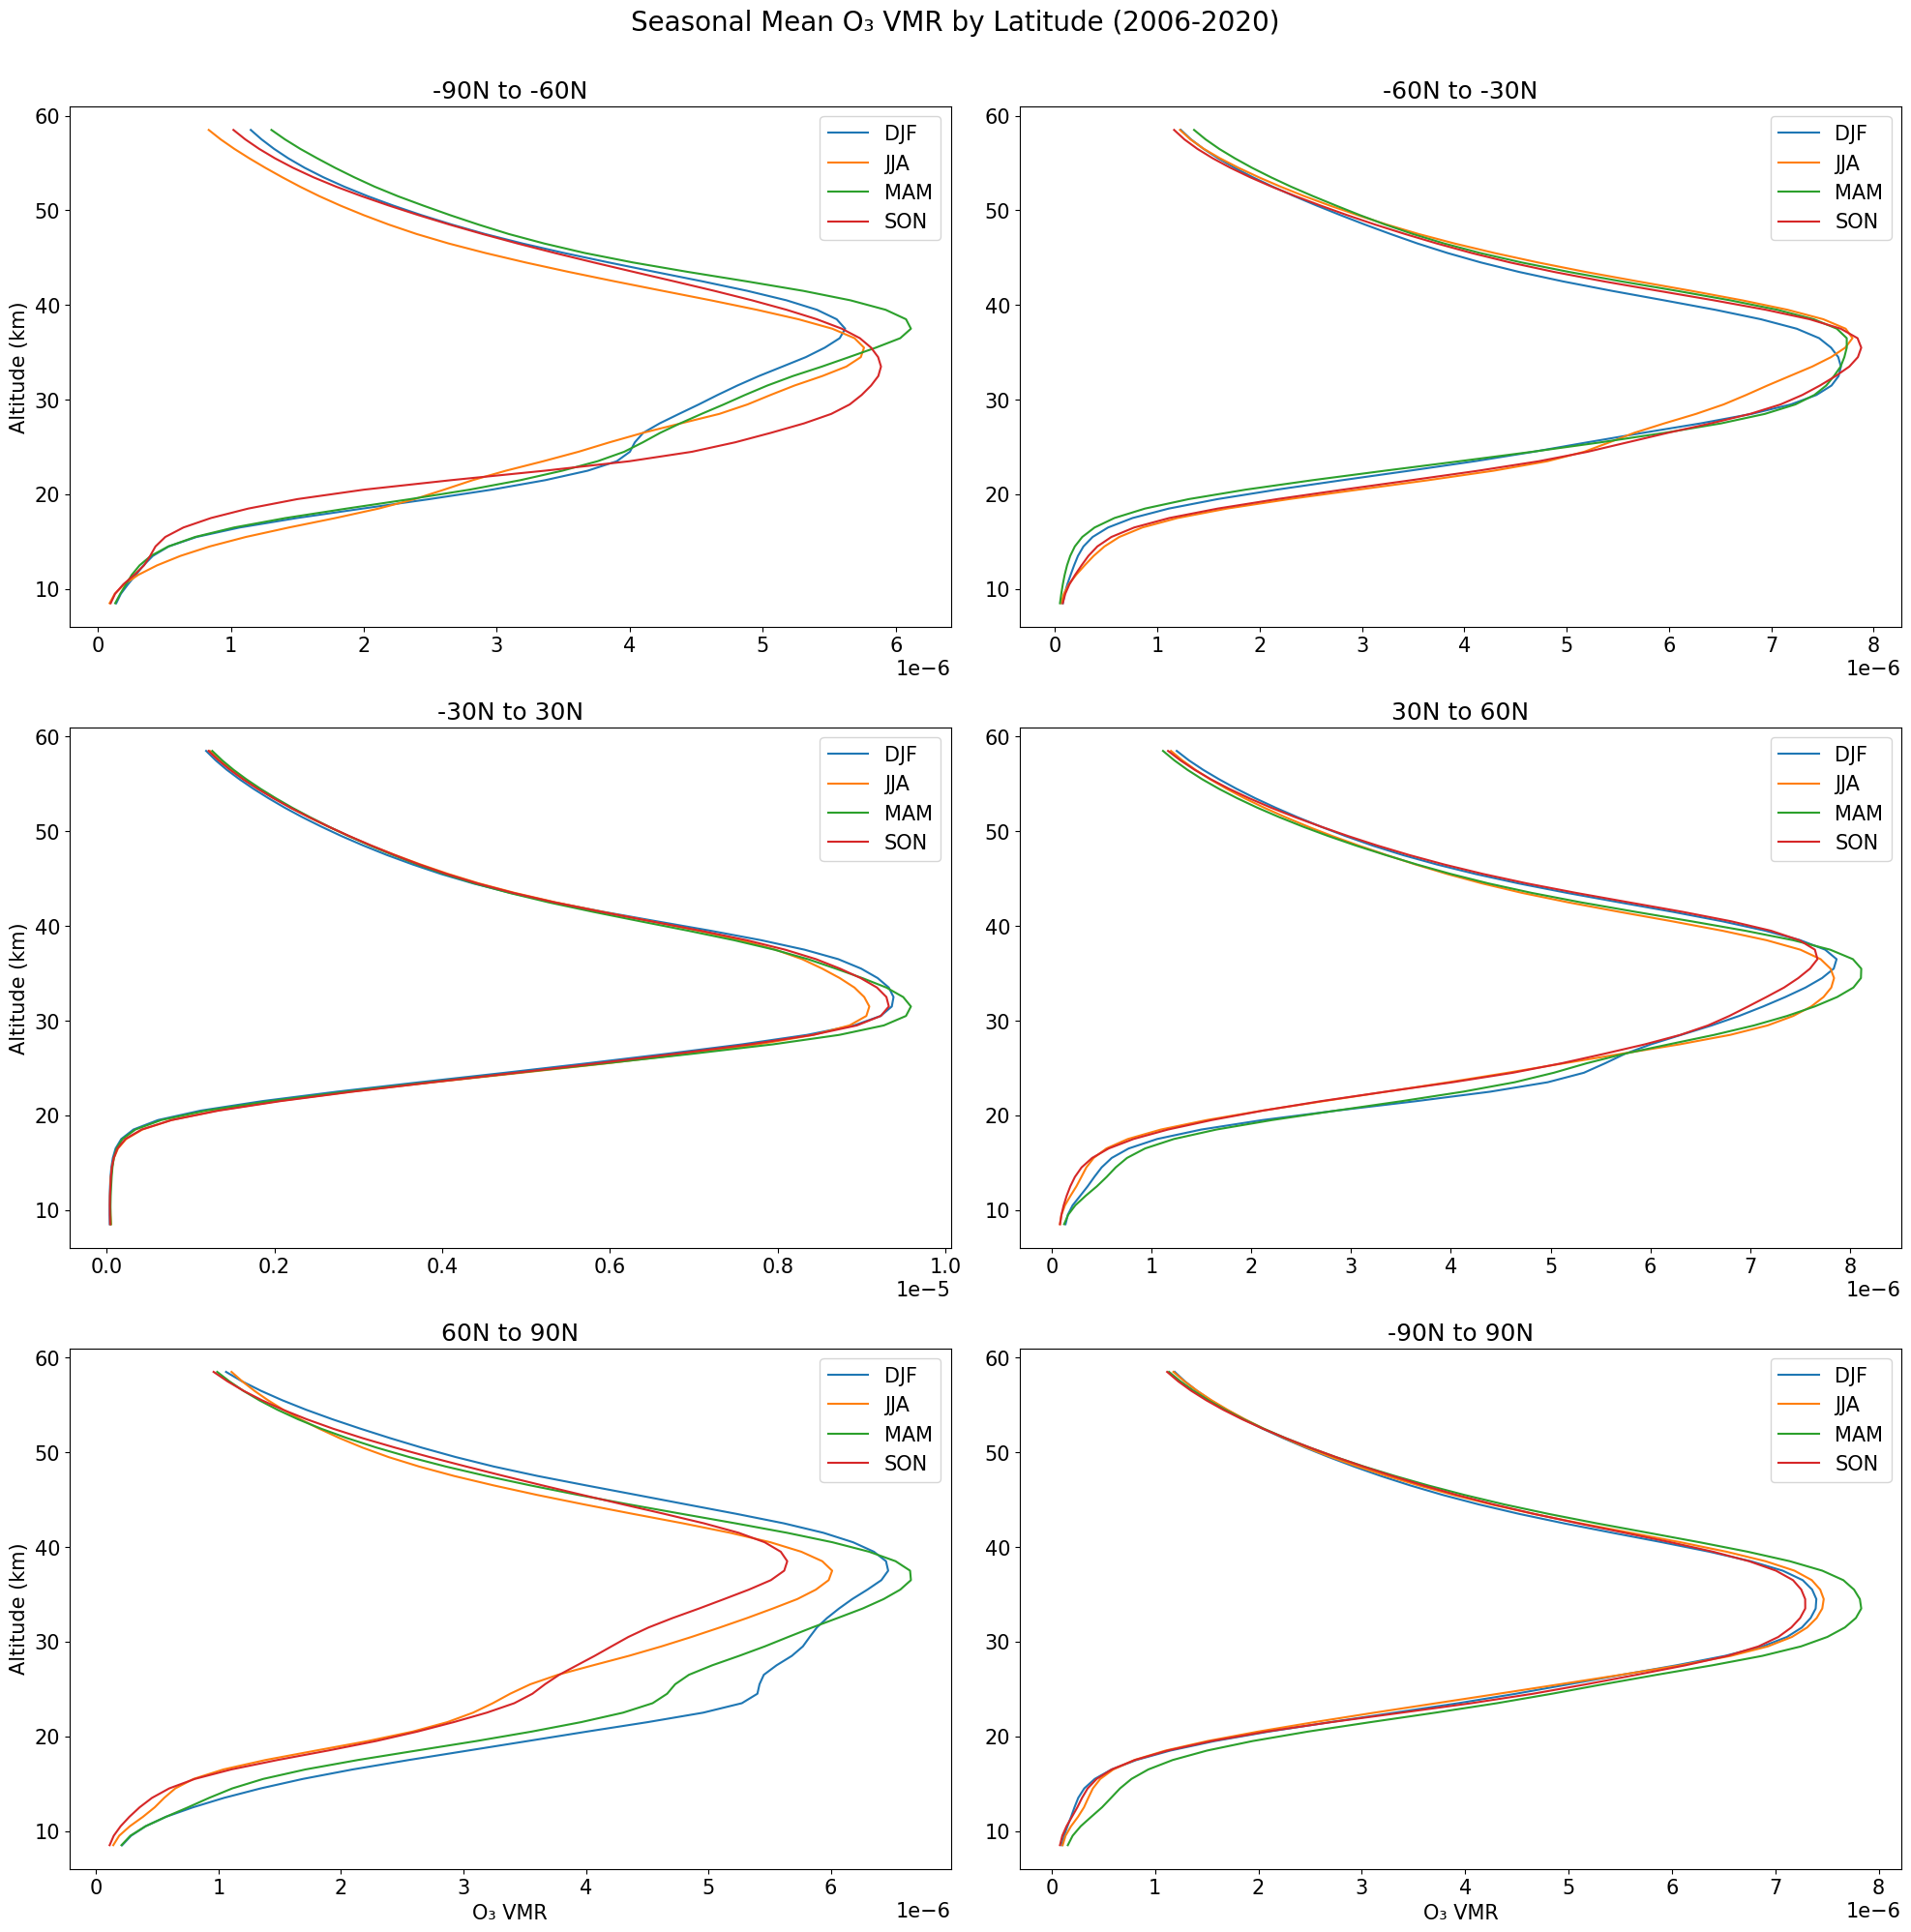

In [10]:
lat_bins = [-90, -60, -30, 30, 60, 90]
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(3,2, figsize = (20,20))

def global_binner(arr):
    O3_seasonal = arr.groupby("time.season")
    for tup in O3_seasonal:
        axes.flat[5].plot(tup[1].mean(dim = "time"), tup[1]["altitude"], label = tup[0])
        axes.flat[5].set_title(f"-90N to 90N")
        axes.flat[5].legend()
    return O3_seasonal.mean(dim = "time")

def seasonal_binner(arr):
    min_lat = arr.latitude.min().item()
    max_lat = arr.latitude.max().item()
    O3_seasonal = arr.groupby("time.season")
    for i, lower_lat_bound in enumerate(lat_bins[:-1]):
        if int(min_lat) >= lower_lat_bound and int(max_lat) <= lat_bins[i + 1]:
            for tup in O3_seasonal:
                axes.flat[i].plot(tup[1].mean(dim = "time"), tup[1]["altitude"], label = tup[0])
                axes.flat[i].set_title(f"{lower_lat_bound}N to {lat_bins[i + 1]}N")
                axes.flat[i].legend()
    return O3_seasonal.mean(dim = "time")


lat_binned = O3_times.groupby_bins(O3_times["latitude"].load(), lat_bins).map(seasonal_binner)
global_binner(O3_times)

plt.suptitle(
    "Seasonal Mean O₃ VMR by Latitude (2006-2020)",
    fontsize=20,
    y=1
)
axes.flat[4].set_xlabel("O₃ VMR")
axes.flat[5].set_xlabel("O₃ VMR")
axes.flat[4].set_ylabel("Altitude (km)")
axes.flat[2].set_ylabel("Altitude (km)")
axes.flat[0].set_ylabel("Altitude (km)")
plt.tight_layout()

title = fig._suptitle.get_text()
fig.savefig(title, bbox_inches="tight")

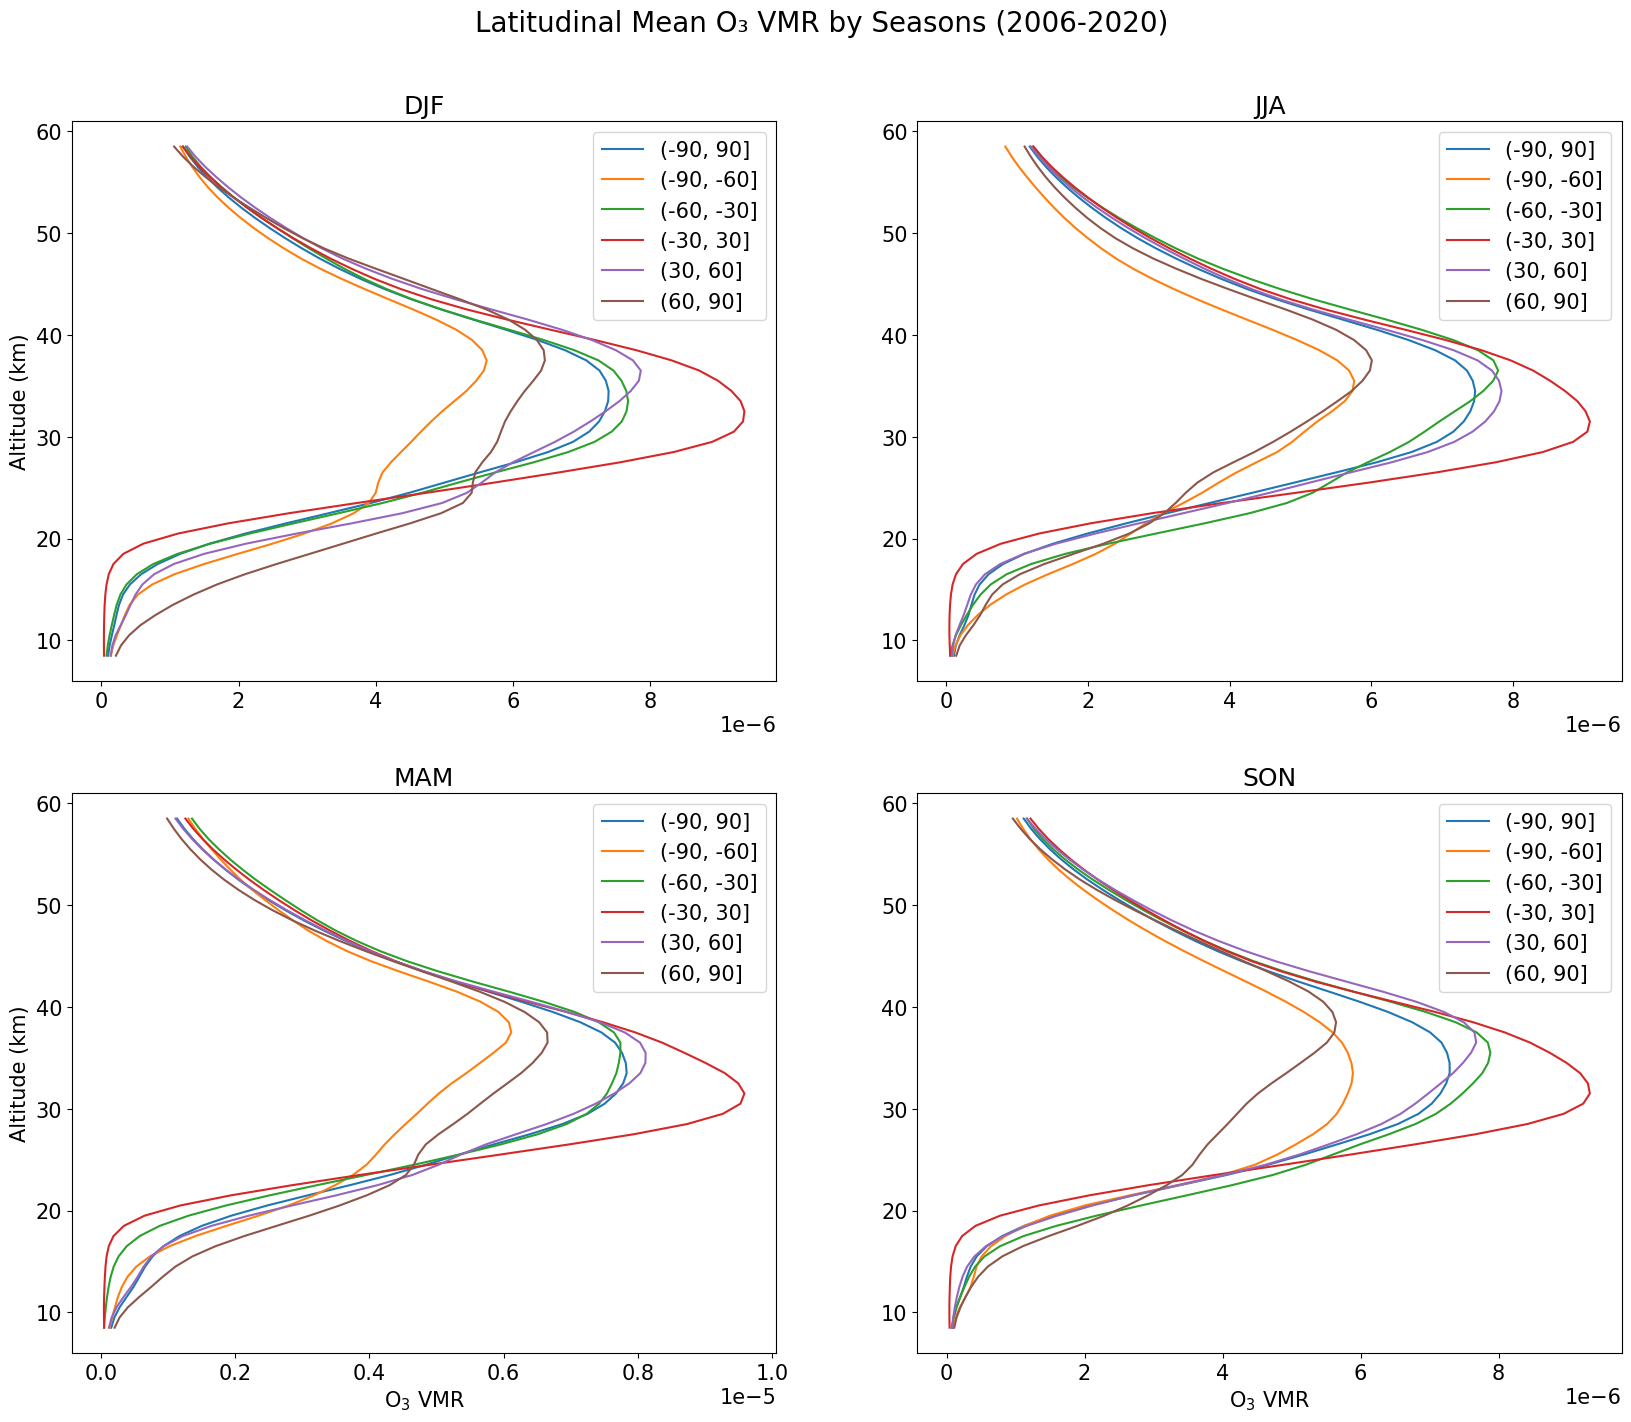

In [11]:
lat_bounds = [(-90,-60), (-60,-30), (-30,30), (30,60), (60,90), (-90,90)]
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(2,2, figsize = (20,16))

def lat_binner(arr):
    lat_bins = [-90, -60, -30, 30, 60, 90]
    lat_binned = arr.groupby_bins("latitude", lat_bins).mean(dim = "time")
    return lat_binned

def global_binner(arr):
    lat_bins = [-90, 90]
    lat_binned = arr.groupby_bins("latitude", lat_bins).mean(dim = "time")
    return lat_binned


season_grouped = O3_times.groupby("time.season")
seasons = season_grouped.map(lat_binner)
global_seasons = season_grouped.map(global_binner)

for i, season in enumerate(global_seasons.season.values):
    seasonal = global_seasons.sel(season = season)
    for j, lat_bin in enumerate(global_seasons.latitude_bins.values):
        latitudinal = seasonal.sel(latitude_bins = lat_bin).plot(ax = axes.flat[i], label = lat_bin, y = "altitude")

for i, season in enumerate(seasons.season.values):
    seasonal = seasons.sel(season = season)
    for j, lat_bin in enumerate(seasons.latitude_bins.values):
        latitudinal = seasonal.sel(latitude_bins = lat_bin).plot(ax = axes.flat[i], label = lat_bin, y = "altitude")
    axes.flat[i].set(title = season)
    if i in [0, 1]:
        axes.flat[i].set(xlabel = None)
    if i in [1,3]:
        axes.flat[i].set(ylabel = None)
    axes.flat[i].legend()

plt.suptitle(
    "Latitudinal Mean O₃ VMR by Seasons (2006-2020)",
    fontsize=20,
    y=0.95
)

axes.flat[0].set(ylabel = "Altitude (km)")
axes.flat[2].set(ylabel = "Altitude (km)")
axes.flat[2].set(xlabel = "O$_3$ VMR")
axes.flat[3].set(xlabel = "O$_3$ VMR")

title = fig._suptitle.get_text()
fig.savefig(title, bbox_inches="tight")

<xarray.DataArray (altitude: 65, latitude_bins: 5)> Size: 1kB
dask.array<groupby_nanmean, shape=(65, 5), dtype=float32, chunksize=(65, 5), chunktype=numpy.ndarray>
Coordinates:
  * altitude       (altitude) float32 260B 0.5 1.5 2.5 3.5 ... 62.5 63.5 64.5
  * latitude_bins  (latitude_bins) interval[int64, right] 80B (-90, -60] ... ...


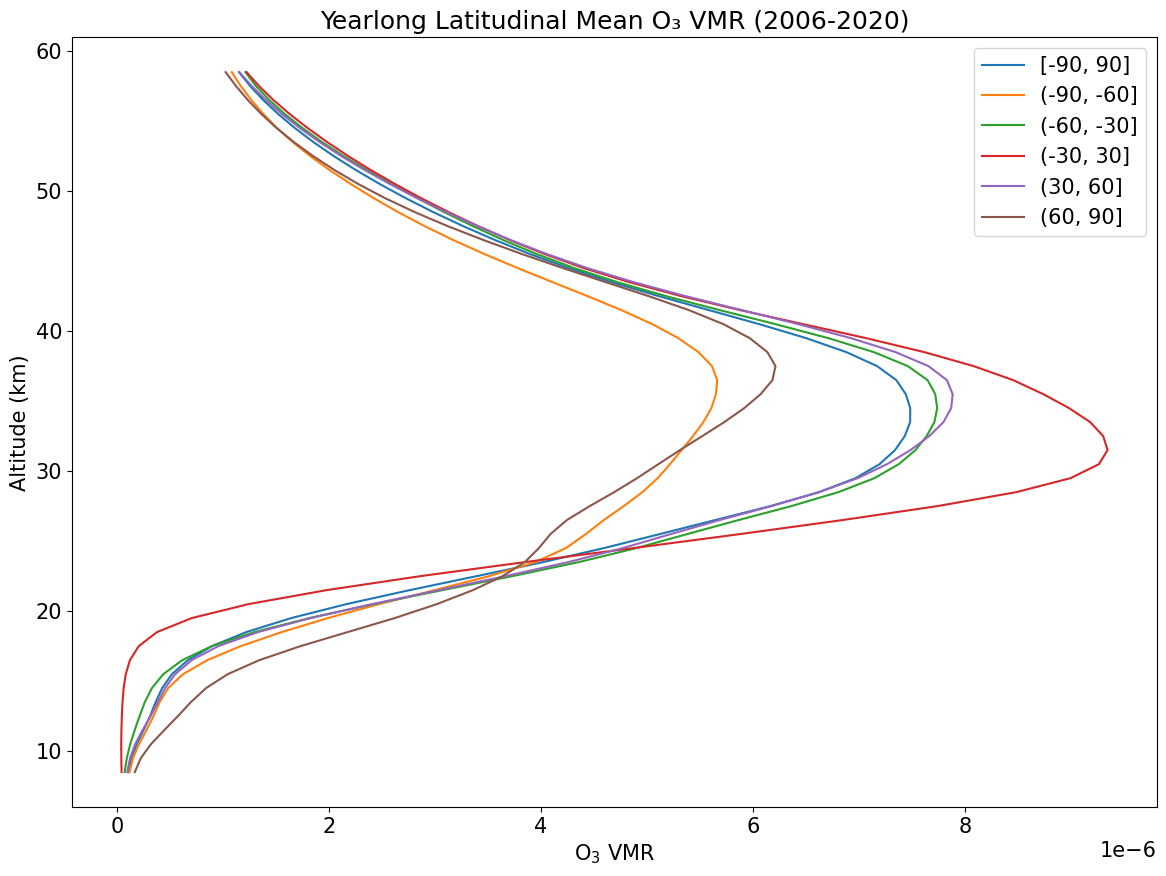

In [12]:
lat_bounds = [(-90,-60), (-60,-30), (-30,30), (30,60), (60,90), (-90,90)]
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, axes = plt.subplots(figsize = (14,10))

def lat_binner(arr):
    lat_bins = [-90, -60, -30, 30, 60, 90]
    lat_binned = arr.groupby_bins("latitude", lat_bins).mean(dim = "time")
    return lat_binned

def global_binner(arr):
    lat_bins = [-90, 90]
    lat_binned = arr.groupby_bins("latitude", lat_bins).mean(dim = "time")
    return lat_binned

O3_times.mean(dim = "time").plot(label = "[-90, 90]", y = "altitude", ax = axes)

print(lat_binner(O3_times))
for i, lat_bin in enumerate(lat_binner(O3_times).latitude_bins.values):
    lat_binner(O3_times).sel(latitude_bins = lat_bin).plot(label = lat_bin, y = "altitude", ax = axes)

plt.title("Yearlong Latitudinal Mean O₃ VMR (2006-2020)")
plt.legend()

plt.ylabel("Altitude (km)")
plt.xlabel("O$_3$ VMR")

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

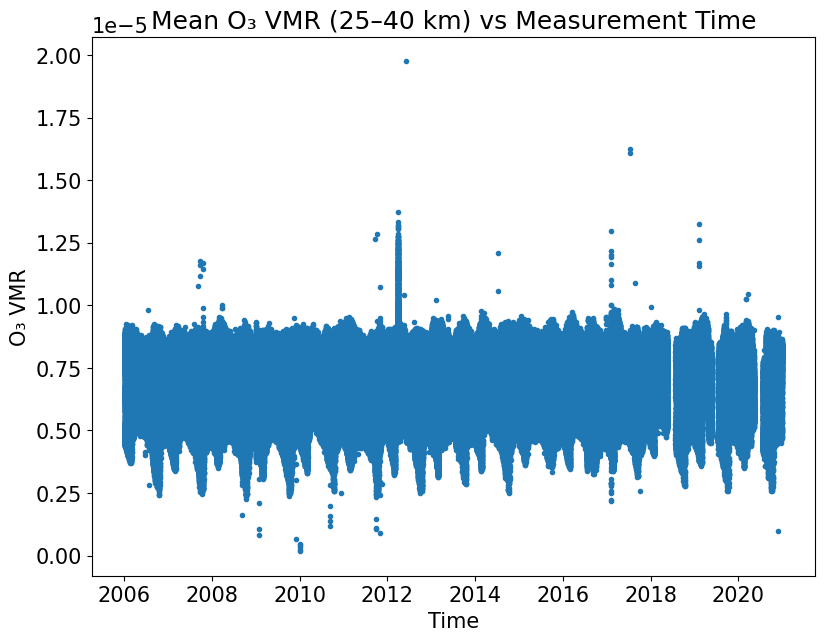

In [13]:
O3_times.sel(altitude = slice(25, 40)).mean(dim = "altitude").plot(marker = ".", linestyle = "None", size = 7)

plt.ylabel("O₃ VMR")
plt.xlabel("Time")
plt.title("Mean O₃ VMR (25–40 km) vs Measurement Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

c:\Program Files\Python312\Lib\site-packages\xarray\groupers.py:498: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


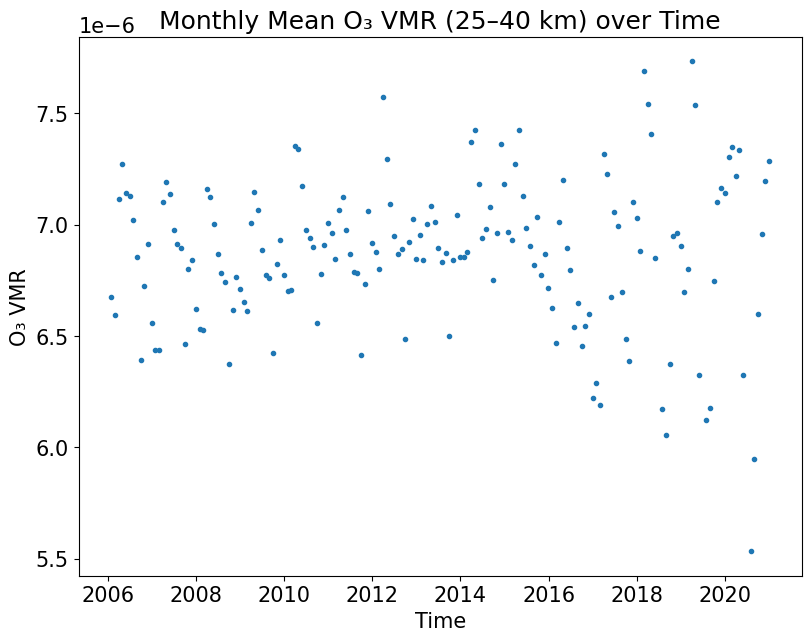

In [14]:
O3_times.sel(altitude = slice(25, 40)).resample(time = "1M").mean(dim = ["altitude", "time"]).plot(marker = ".", linestyle = "None", size = 7)

plt.ylabel("O₃ VMR")
plt.xlabel("Time")
plt.title("Monthly Mean O₃ VMR (25–40 km) over Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

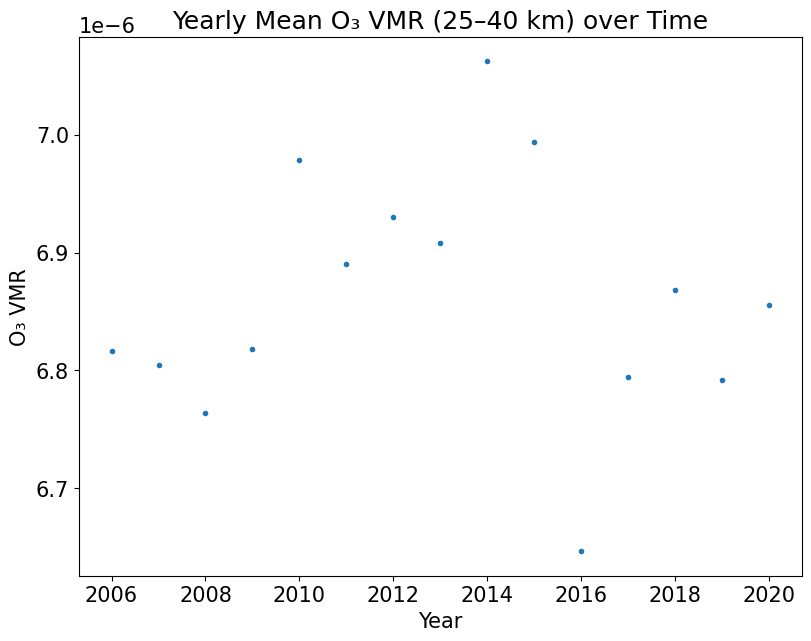

In [15]:
O3_times.sel(altitude = slice(25, 40)).groupby("time.year").mean(dim = ["altitude", "time"]).plot(marker = ".", linestyle = "None", size = 7)

plt.ylabel("O₃ VMR")
plt.xlabel("Year")
plt.title("Yearly Mean O₃ VMR (25–40 km) over Time")

fig = plt.gcf()
axes = plt.gca()

title = axes.get_title()
fig.savefig(title, bbox_inches="tight")

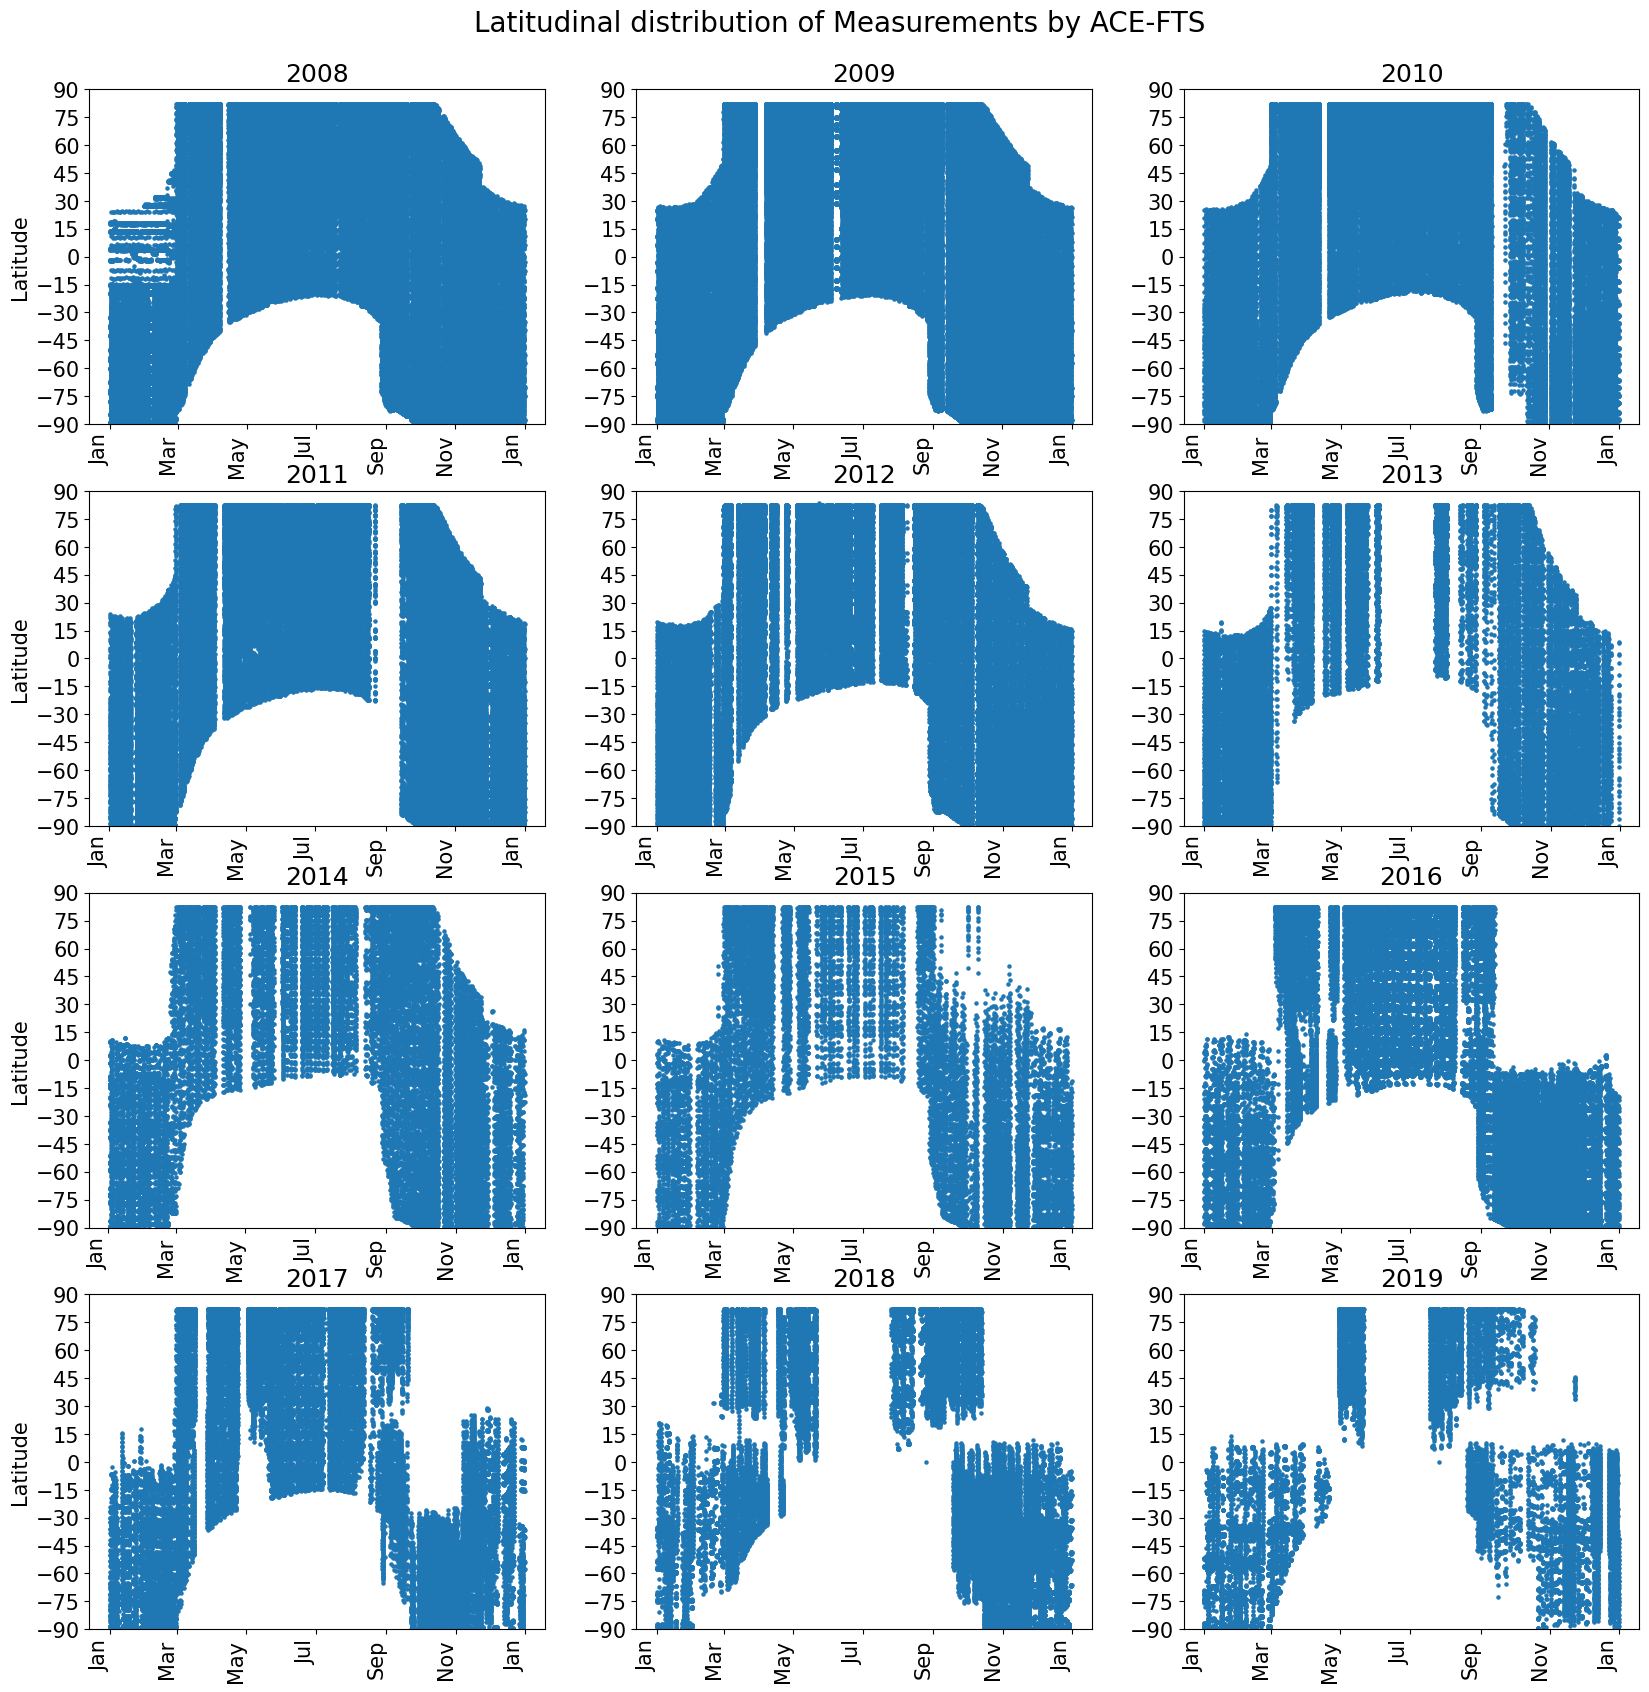

In [21]:
fig, axes = plt.subplots(4, 3, figsize = (20, 20))

years = [str(i) for i in range(2013 - 5, 2025 - 5)]
import matplotlib.dates as mdates

for idx, year in enumerate(years):
    ax = axes.flat[idx]
    ax.scatter(O3_times.sel(time = slice(year + "-01-01", year + "-12-31")).time, O3_times.sel(time = slice(year + "-01-01", year + "-12-31")).latitude, s = 5)
    ax.set_title(year)
    
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,3,5,7,9,11]))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    ax.set_ylim(-90, 90)
    ax.set_yticks(np.arange(-90, 91, 15))

fig = plt.gcf()

plt.suptitle(
    "Latitudinal distribution of Measurements by ACE-FTS", 
    fontsize=20,
    y=0.92
)

axes.flat[0].set(ylabel = "Latitude")
axes.flat[9].set(ylabel = "Latitude")
axes.flat[6].set(ylabel = "Latitude")
axes.flat[3].set(ylabel = "Latitude")

title = fig._suptitle.get_text()
fig.savefig(title, bbox_inches="tight")